#Climate and Environmental Data Clustering and Forecasting:

This project performs an in-depth analysis of climate and environmental data across multiple countries. The goal is to identify patterns among countries using clustering and to forecast key environmental metrics with regression. We use a dataset of climate indicators (such as temperature, CO₂ emissions, and rainfall) for many countries over several years.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import files
uploaded=files.upload()

Saving update_temperature[1].csv to update_temperature[1] (1).csv


In [33]:
df=pd.read_csv("update_temperature[1].csv")
df.head()
df

,Year,Country,Avg_Temperature_degC,CO2_Emissions_tons_per_capita,Sea_Level_Rise_mm,Rainfall_mm,Population,Renewable_Energy_pct,Extreme_Weather_Events,Forest_Area_pct
0,2000,United States,13.5,20.2,0,715,282500000,6.2,38,33.1
1,2000,China,12.8,2.7,0,645,1267000000,16.5,24,18.8
2,2000,Germany,9.3,10.1,0,700,82200000,6.6,12,31.8
3,2000,Brazil,24.9,1.9,0,1760,175000000,83.7,18,65.4
4,2000,Australia,21.7,17.2,0,534,19200000,8.8,11,16.2
...,...,...,...,...,...,...,...,...,...,...
151,2005,Nigeria,27.4,0.8,8,1132,138870000,87.2,11,12.6
152,2010,Nigeria,27.6,0.6,17,1165,158500000,86.9,14,11.9
153,2015,Nigeria,27.9,0.5,25,1127,177480000,86.1,17,11.1
154,2020,Nigeria,28.2,0.6,34,1148,206140000,83.5,21,10.3


In [34]:
print("null_values:", df.isnull().sum())
print("dupliacted_values:", df.duplicated().sum())
print("total unique country:",df['Country'].nunique())
print("total unique year:",df['Year'].nunique())
print("rows and columns:", df.shape)

null_values: Year                             0
Country                          0
Avg_Temperature_degC             0
CO2_Emissions_tons_per_capita    0
Sea_Level_Rise_mm                0
Rainfall_mm                      0
Population                       0
Renewable_Energy_pct             0
Extreme_Weather_Events           0
Forest_Area_pct                  0
dtype: int64
dupliacted_values: 0
total unique country: 19
total unique year: 6
rows and columns: (156, 10)


In [35]:
for column in df.select_dtypes(include="number").columns:
  Q3=df[column].quantile(0.75)
  Q1=df[column].quantile(0.25)          ### outlier handling
  IQR=Q3-Q1
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR
df[column] = df[column].clip(lower_limit, upper_limit)
df.shape

(156, 10)

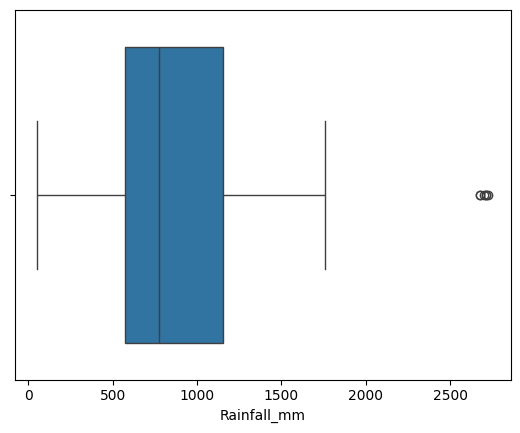

In [36]:
sns.boxplot(data=df, x="Rainfall_mm")
plt.show()

In [57]:
for column in df.select_dtypes(include="number").columns:
  print(df[column].name)
  print(df[column].skew())

Year
-0.06638744206505794
Avg_Temperature_degC
-0.06721848746786922
CO2_Emissions_tons_per_capita
0.4875474881145871
Sea_Level_Rise_mm
0.1635350584996545
Rainfall_mm
1.4327852070029015
Population
1.8674287981358957
Renewable_Energy_pct
1.0430485537734178
Extreme_Weather_Events
1.246049838575831
Forest_Area_pct
0.3570190682711537


## Correlation matrix:

In [38]:
corr=df[["Rainfall_mm", "Forest_Area_pct", "Population", "Extreme_Weather_Events",
         "Renewable_Energy_pct", "Sea_Level_Rise_mm", "CO2_Emissions_tons_per_capita", "Avg_Temperature_degC"]].corr()
corr

,Rainfall_mm,Forest_Area_pct,Population,Extreme_Weather_Events,Renewable_Energy_pct,Sea_Level_Rise_mm,CO2_Emissions_tons_per_capita,Avg_Temperature_degC
Rainfall_mm,1.000000,0.513973,0.022289,0.092504,0.412001,-0.004120,-0.560112,0.377724
Forest_Area_pct,0.513973,1.000000,-0.166835,0.070037,0.146003,0.004924,-0.093869,-0.253284
Population,0.022289,-0.166835,1.000000,0.579240,-0.046560,0.099394,-0.353041,0.154000
Extreme_Weather_Events,0.092504,0.070037,0.579240,1.000000,0.146729,0.603502,-0.150739,0.067705
Renewable_Energy_pct,0.412001,0.146003,-0.046560,0.146729,1.000000,0.219608,-0.535118,0.392683
Sea_Level_Rise_mm,-0.004120,0.004924,0.099394,0.603502,0.219608,1.000000,-0.068488,0.071318
CO2_Emissions_tons_per_capita,-0.560112,-0.093869,-0.353041,-0.150739,-0.535118,-0.068488,1.000000,-0.426513
Avg_Temperature_degC,0.377724,-0.253284,0.154000,0.067705,0.392683,0.071318,-0.426513,1.000000


#Relation	Correlation	Meaning
Population ↔ Extreme Events	0.58	More people → more events recorded

Rainfall ↔ Forest	0.51	Forests increase precipitation

Extreme Events ↔ Sea Level	0.60	Coastal countries affected more

Rainfall ↔ Renewable Energy	0.41	Hydropower dominant countries

CO₂ ↔ Rainfall	–0.56	High-CO₂ nations are mostly dry climates

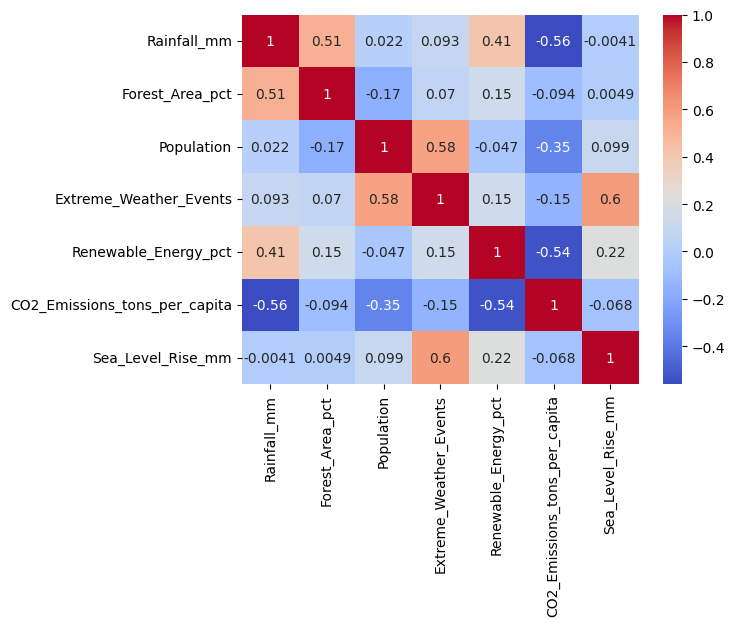

In [39]:
corr=df[["Rainfall_mm", "Forest_Area_pct", "Population", "Extreme_Weather_Events", "Renewable_Energy_pct",
         "CO2_Emissions_tons_per_capita", "Sea_Level_Rise_mm"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.xticks(rotation=90)
plt.show()

The dataset contains annual measurements of environmental variables for each country. Key features include average temperature, total CO₂ emissions, and total annual rainfall, among others. Each record corresponds to a country–year pair. This multi-year, multi-country dataset allows us to analyze global trends and compare countries on the same metrics.

In [40]:
df.describe()


,Year,Avg_Temperature_degC,CO2_Emissions_tons_per_capita,Sea_Level_Rise_mm,Rainfall_mm,Population,Renewable_Energy_pct,Extreme_Weather_Events,Forest_Area_pct
count,156.000000,156.000000,156.000000,156.000000,156.000000,1.560000e+02,156.000000,156.000000,156.000000
mean,2012.333333,17.620513,7.673718,24.333333,937.397436,2.952075e+08,31.203846,20.185897,32.191667
std,8.326664,7.221658,5.450198,16.916239,532.954803,4.414786e+08,26.741843,10.951980,18.335613
min,2000.000000,5.100000,0.500000,0.000000,54.000000,1.915300e+07,0.000000,2.000000,0.500000
25%,2005.000000,12.800000,2.175000,10.000000,576.000000,5.448750e+07,14.850000,12.750000,17.225000
50%,2012.500000,15.500000,7.350000,23.500000,775.500000,1.230873e+08,19.800000,18.000000,32.000000
75%,2020.000000,25.225000,10.800000,36.000000,1151.750000,2.132000e+08,43.050000,25.000000,48.125000
max,2024.000000,28.500000,20.200000,59.000000,2726.000000,1.426000e+09,87.200000,64.000000,68.500000


### Countrywise average temprature: Top 5 highest  

Country
Nigeria         27.816667
Indonesia       26.683333
Saudi Arabia    26.383333
Brazil          25.808333
India           25.083333
Name: Avg_Temperature_degC, dtype: float64


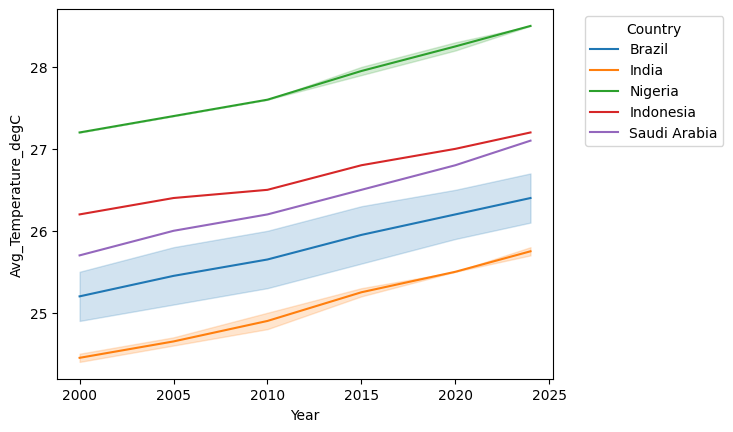

In [41]:
top_5_countries_temp=df.groupby(["Country"])["Avg_Temperature_degC"].mean().sort_values(ascending=False)[:5]
print(top_5_countries_temp)

### Nigeria has the highest average temperature.

# Get the names of the top 5 countries from group by top_5_countries_temp
top_country_names = top_5_countries_temp.index

# Filter the original DataFrame to include only these top 5 countries
df_top_5 = df[df['Country'].isin(top_country_names)]

# Now plot using this filtered DataFrame
sns.lineplot(x='Year', y='Avg_Temperature_degC', hue='Country', data=df_top_5)
plt.legend(title="Country",  bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

### Countrywise CO2 emissions: Top 5 CO2 emitting country

Country
Saudi Arabia     17.016667
United States    16.716667
Australia        16.550000
Canada           15.400000
Russia           11.166667
Name: CO2_Emissions_tons_per_capita, dtype: float64


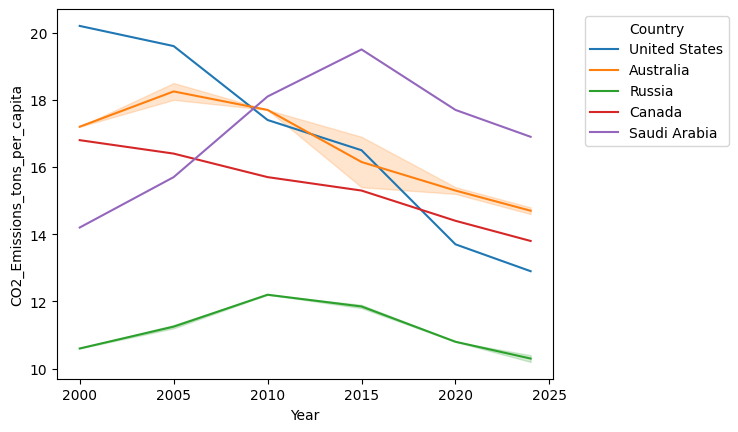

In [42]:
top_5_countries_co2=df.groupby(["Country"])["CO2_Emissions_tons_per_capita"].mean().sort_values(ascending=False)[:5]
print(top_5_countries_co2)

top_cname=top_5_countries_co2.index

df_top_co2=df[df["Country"].isin(top_cname)]
df_top_co2

###### Saudi Arabia has highest CO2 emissions in tons per capita

sns.lineplot(x=df_top_co2["Year"], y=df_top_co2["CO2_Emissions_tons_per_capita"], hue=df_top_co2["Country"])
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


### Countrywise rainfall:

Country
Indonesia         2701.833333
Japan             1707.166667
Brazil            1649.166667
South Korea       1279.000000
United Kingdom    1225.333333
Name: Rainfall_mm, dtype: float64
Index(['Indonesia', 'Japan', 'Brazil', 'South Korea', 'United Kingdom'], dtype='object', name='Country')


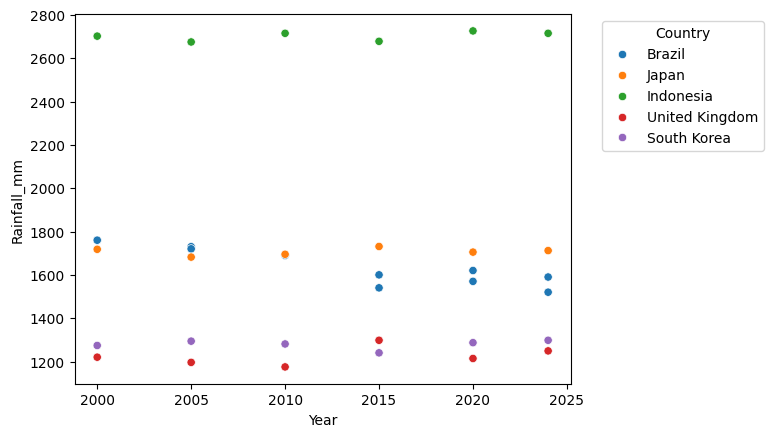

In [43]:
top5_rainfall=df.groupby("Country")["Rainfall_mm"].mean().sort_values(ascending=False)[:5]
print(top5_rainfall)

top5_rainfall_names=top5_rainfall.index
print(top5_rainfall_names)

df_rainfall=df[df["Country"].isin(top5_rainfall_names)]
df_rainfall                                                       ### Indonesia has highest rainfall.


sns.scatterplot(x=df_rainfall["Year"], y=df_rainfall["Rainfall_mm"], hue=df_rainfall["Country"])
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

### Top 5 countries with highest forest area percentage

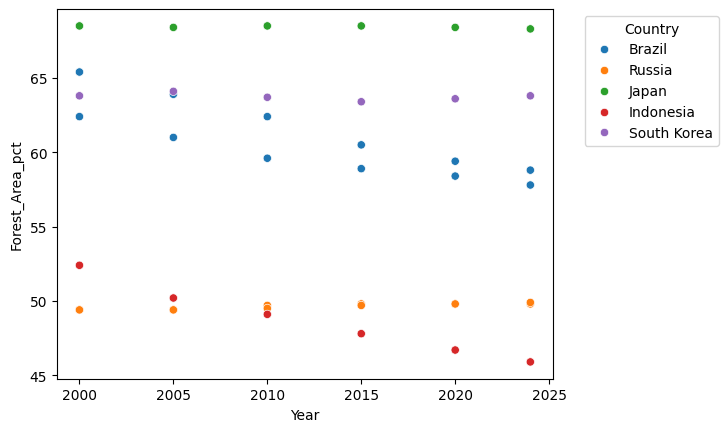

In [44]:
top5_forest=df.groupby("Country")["Forest_Area_pct"].mean().sort_values(ascending=False)[:5]

top_names=top5_forest.index

df_forest=df[df["Country"].isin(top_names)]   ### brazil has highest forest areal percentage.

sns.scatterplot(x=df_forest["Year"], y=df_forest["Forest_Area_pct"], hue=df_forest["Country"])
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

## Top5 countries which has most of the extreme weather events:  

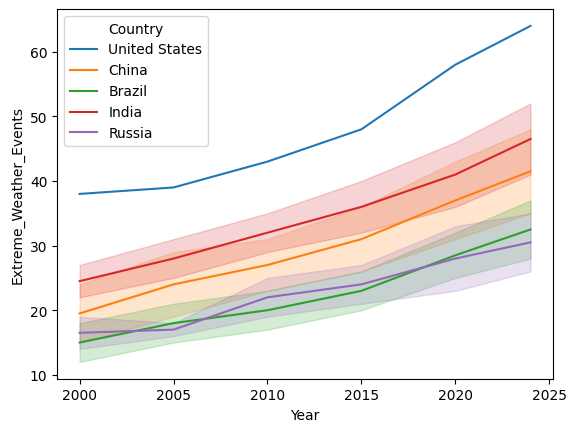

In [45]:
df.head(1)
top5_Extreme=df.groupby("Country")["Extreme_Weather_Events"].mean().sort_values(ascending=False)[:5]
top5_Extreme

top5_extreme_names=top5_Extreme.index
df_extreme=df[df["Country"].isin(top5_extreme_names)]     ### united states has most of the extreme weather events.

sns.lineplot(data=df_extreme, x="Year", y="Extreme_Weather_Events", hue="Country")
plt.show()

Data Exploration

Before applying clustering, we explore the data to understand each variable’s behavior:

CO₂ Emissions: We examine the distribution and trends in CO₂ emissions by country. Typically, the plots show that a few countries have very high emissions (industrialized nations), while many countries have lower emissions. Over time, global CO₂ tends to increase.

Temperature: We look at average temperatures across countries. The data often shows a gradual rise in global average temperature, reflecting climate warming, with regional variations across countries.

Rainfall: We visualize annual rainfall totals. This highlights how precipitation varies by region; some countries have consistently high rainfall, while others (such as desert regions) have very low values.



These plots help us see broad differences between countries and global trends. For example, time-series plots might reveal that countries with growing industries are increasing their emissions more sharply than others. These initial insights guide the clustering and modeling steps of the analysis.

#Clustering:

We want to group countries that have similar environmental profiles, so we apply K-means clustering (a common unsupervised learning algorithm). We select relevant features from the dataset (for example: average temperature, CO₂ emissions, and rainfall). Because these features are on different scales (CO₂ is in metric tons, rainfall in millimeters, etc.), we scale (standardize) them. Scaling ensures that each variable contributes equally to the distance calculations in the clustering algorithm.

In [46]:
# Group by each country and take MEAN of all numeric climate features
df_country = df.groupby("Country").mean(numeric_only=True)

# Drop Year (not meaningful in clustering)
df_country = df_country.drop(columns=["Year"])


# features
x = df_country.copy()

## feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


from sklearn.cluster import KMeans
for k in range(2,6):
    km = KMeans(n_clusters=k, random_state=0)
    labels = km.fit_predict(x_scaled)
    print(k, silhouette_score(x_scaled, labels))





2 0.27325873719755306
3 0.345415813532582
4 0.3559786736310077
5 0.2757697060807715


In [47]:
# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
df_country["Cluster"] = kmeans.fit_predict(x_scaled)

print(df_country["Cluster"])

score = silhouette_score(x_scaled, df_country["Cluster"])
print("Silhouette Score:", score)

# Now create cluster profile
cluster_profile = df_country.groupby("Cluster").mean()
cluster_profile

Country
Australia         0
Brazil            1
Canada            0
China             2
France            0
Germany           0
India             2
Indonesia         1
Italy             0
Japan             0
Mexico            0
Nigeria           1
Russia            0
Saudi Arabia      0
South Africa      0
South Korea       0
Spain             0
United Kingdom    0
United States     3
Name: Cluster, dtype: int32
Silhouette Score: 0.3559786736310077


,Avg_Temperature_degC,CO2_Emissions_tons_per_capita,Sea_Level_Rise_mm,Rainfall_mm,Population,Renewable_Energy_pct,Extreme_Weather_Events,Forest_Area_pct
Cluster,,,,,,,,
0,14.843590,9.577564,22.929487,777.807692,6.876820e+07,20.517949,14.564103,32.548077
1,26.769444,1.486111,24.833333,1828.555556,2.056206e+08,69.636111,20.500000,40.111111
2,19.779167,3.666667,25.916667,863.875000,1.308021e+09,23.762500,32.333333,22.466667
3,14.050000,16.716667,29.000000,754.500000,3.132667e+08,12.900000,48.333333,33.516667


PCA and t-SNE Visualizations

To visualize the high-dimensional data, we apply dimension reduction:

Principal Component Analysis (PCA): PCA projects the data into a lower-dimensional space by finding the directions (principal components) of greatest variance. By plotting the first two principal components, we can see how countries spread out in the data and how clusters separate in a 2D plot.

t-SNE (t-distributed Stochastic Neighbor Embedding): t-SNE is another technique to reduce dimensions, designed to preserve local similarities between points. A t-SNE plot of the data often reveals cluster structure more clearly than PCA when the true structure is complex.

We then plot each country in the reduced PCA and t-SNE spaces with colors indicating their cluster membership. These scatter plots help confirm the structure of the clusters identified by K-means.

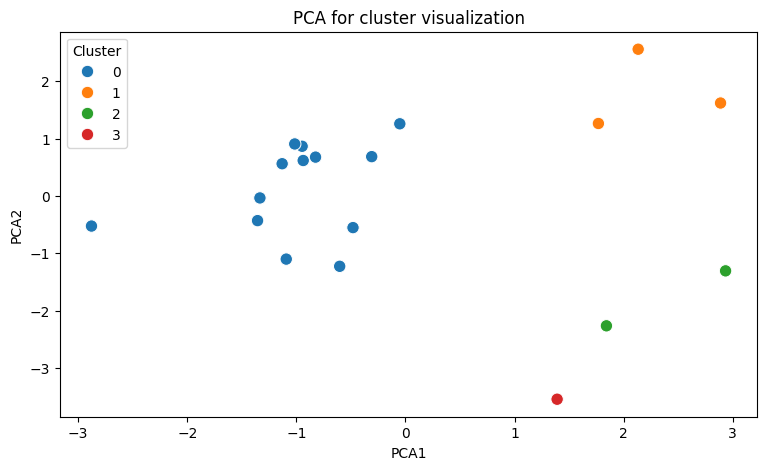

In [48]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2, random_state=0)
pca_result=pca.fit_transform(x_scaled)

df_country["PCA1"]=pca_result[:,0]
df_country["PCA2"]=pca_result[:,1]

# print("PCA1:", df_country["PCA1"])
# print("PCA2:", df_country["PCA2"])



plt.figure(figsize=(9,5))
sns.scatterplot(data=df_country, x="PCA1", y="PCA2", hue="Cluster", palette="tab10", s=80)
plt.title("PCA for cluster visualization")
plt.show()

PCA and t-SNE show different cluster shapes because they use completely different dimensionality reduction methods. PCA preserves global structure but distorts local neighborhoods, while t-SNE preserves local neighborhoods but distorts global distances. Therefore, their 2D visualizations will never match each other or the true K-Means cluster structure exactly.

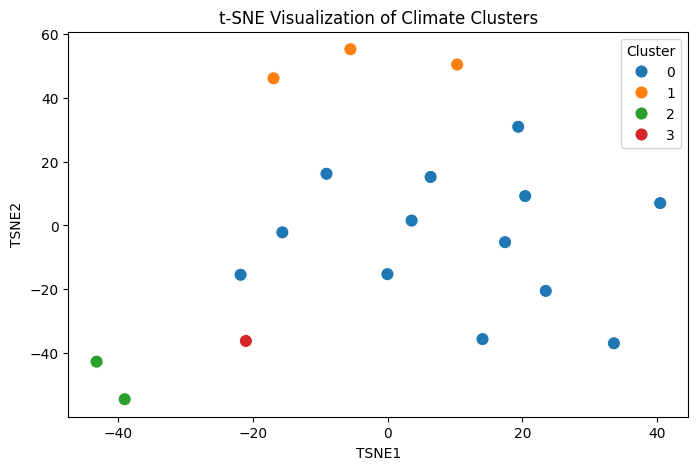

In [49]:
#t-SNE (2D Visualization of clusters)

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=10, random_state=0)
tsne_result = tsne.fit_transform(x_scaled)

df_country["TSNE1"] = tsne_result[:, 0]
df_country["TSNE2"] = tsne_result[:, 1]

# print("TSNE1:", df_country["TSNE1"])
# print("TSNE2:", df_country["TSNE2"])



plt.figure(figsize=(8,5))
sns.scatterplot(data=df_country,x="TSNE1",y="TSNE2", hue="Cluster", palette="tab10", s=90)
plt.title("t-SNE Visualization of Climate Clusters")
plt.legend(title="Cluster")
plt.show()

In [50]:
cluster_profile = df_country.groupby("Cluster").mean()
cluster_profile


,Avg_Temperature_degC,CO2_Emissions_tons_per_capita,Sea_Level_Rise_mm,Rainfall_mm,Population,Renewable_Energy_pct,Extreme_Weather_Events,Forest_Area_pct,PCA1,PCA2,TSNE1,TSNE2
Cluster,,,,,,,,,,,,
0,14.843590,9.577564,22.929487,777.807692,6.876820e+07,20.517949,14.564103,32.548077,-0.996771,0.129415,10.171579,-3.949466
1,26.769444,1.486111,24.833333,1828.555556,2.056206e+08,69.636111,20.500000,40.111111,2.263582,1.812586,-4.046793,50.615856
2,19.779167,3.666667,25.916667,863.875000,1.308021e+09,23.762500,32.333333,22.466667,2.388439,-1.786942,-41.116798,-48.620560
3,14.050000,16.716667,29.000000,754.500000,3.132667e+08,12.900000,48.333333,33.516667,1.390404,-3.546269,-21.037117,-36.237141


In [51]:
cluster_summary = df_country.groupby("Cluster").mean()[[
    "Avg_Temperature_degC",
    "CO2_Emissions_tons_per_capita",
    "Rainfall_mm",
    "Forest_Area_pct",
    "Population"
]]
cluster_summary


,Avg_Temperature_degC,CO2_Emissions_tons_per_capita,Rainfall_mm,Forest_Area_pct,Population
Cluster,,,,,
0,14.843590,9.577564,777.807692,32.548077,6.876820e+07
1,26.769444,1.486111,1828.555556,40.111111,2.056206e+08
2,19.779167,3.666667,863.875000,22.466667,1.308021e+09
3,14.050000,16.716667,754.500000,33.516667,3.132667e+08


In [52]:
print(df_country[["Cluster"]].sort_values("Cluster"))


                Cluster
Country                
Australia             0
Canada                0
Germany               0
France                0
Russia                0
Mexico                0
Japan                 0
Italy                 0
South Africa          0
Saudi Arabia          0
South Korea           0
Spain                 0
United Kingdom        0
Nigeria               1
Brazil                1
Indonesia             1
China                 2
India                 2
United States         3


In [53]:
cluster_summary = df_country.groupby("Cluster").mean()
cluster_summary


,Avg_Temperature_degC,CO2_Emissions_tons_per_capita,Sea_Level_Rise_mm,Rainfall_mm,Population,Renewable_Energy_pct,Extreme_Weather_Events,Forest_Area_pct,PCA1,PCA2,TSNE1,TSNE2
Cluster,,,,,,,,,,,,
0,14.843590,9.577564,22.929487,777.807692,6.876820e+07,20.517949,14.564103,32.548077,-0.996771,0.129415,10.171579,-3.949466
1,26.769444,1.486111,24.833333,1828.555556,2.056206e+08,69.636111,20.500000,40.111111,2.263582,1.812586,-4.046793,50.615856
2,19.779167,3.666667,25.916667,863.875000,1.308021e+09,23.762500,32.333333,22.466667,2.388439,-1.786942,-41.116798,-48.620560
3,14.050000,16.716667,29.000000,754.500000,3.132667e+08,12.900000,48.333333,33.516667,1.390404,-3.546269,-21.037117,-36.237141


In [54]:
df.head(1)

,Year,Country,Avg_Temperature_degC,CO2_Emissions_tons_per_capita,Sea_Level_Rise_mm,Rainfall_mm,Population,Renewable_Energy_pct,Extreme_Weather_Events,Forest_Area_pct
0,2000,United States,13.5,20.2,0,715,282500000,6.2,38,33.1


In [55]:
df_with_cluster = pd.merge(df, df_country["Cluster"], on="Country")
df_with_cluster.head()

,Year,Country,Avg_Temperature_degC,CO2_Emissions_tons_per_capita,Sea_Level_Rise_mm,Rainfall_mm,Population,Renewable_Energy_pct,Extreme_Weather_Events,Forest_Area_pct,Cluster
0,2000,United States,13.5,20.2,0,715,282500000,6.2,38,33.1,3
1,2000,China,12.8,2.7,0,645,1267000000,16.5,24,18.8,2
2,2000,Germany,9.3,10.1,0,700,82200000,6.6,12,31.8,0
3,2000,Brazil,24.9,1.9,0,1760,175000000,83.7,18,65.4,1
4,2000,Australia,21.7,17.2,0,534,19200000,8.8,11,16.2,0


### CO2 Emissions prediction using LinearRegression:

We also model trends in environmental metrics over time. As a simple forecasting task, we fit a linear regression of CO₂ emissions versus year for each country (treating year as the predictor and emissions as the response). The resulting model provides a basic projection of future emissions, assuming the past trend continues linearly. We evaluate each model (e.g., using R² or mean squared error) to see how well it fits the historical data.

Examining the regression results allows us to compare trends between countries. For example, a country with a high positive slope in its CO₂ regression is increasing emissions rapidly, whereas a flatter trend indicates more stable emissions.

In [56]:
from sklearn.linear_model import LinearRegression

# Future years to predict
future_years = [[2025], [2030], [2035]]

# List of all countries
countries = df_with_cluster["Country"].unique()

for country_name in countries:

    # Filter dataset for this country
    country_data = df_with_cluster[df_with_cluster["Country"] == country_name]

    # X = Year, y = CO2
    X = country_data[["Year"]]   # Must be 2D
    y = country_data["CO2_Emissions_tons_per_capita"]

    # Build the model
    model = LinearRegression()
    model.fit(X, y)

    # Predict future CO₂ values
    predicted_values = model.predict(future_years)

    # Print results
    print(f"\nCountry: {country_name}")
    print("2025:", round(predicted_values[0], 3))
    print("2030:", round(predicted_values[1], 3))
    print("2035:", round(predicted_values[2], 3))



Country: United States
2025: 12.612
2030: 10.992
2035: 9.372

Country: China
2025: 8.228
2030: 9.14
2035: 10.052

Country: Germany
2025: 7.237
2030: 6.617
2035: 5.997

Country: Brazil
2025: 2.097
2030: 2.122
2035: 2.148

Country: Australia
2025: 14.852
2030: 14.182
2035: 13.512

Country: India
2025: 2.022
2030: 2.262
2035: 2.501

Country: Nigeria
2025: 0.551
2030: 0.529
2035: 0.506

Country: Russia
2025: 10.948
2030: 10.862
2035: 10.775

Country: South Africa
2025: 7.36
2030: 7.029
2035: 6.697

Country: Canada
2025: 13.81
2030: 13.182
2035: 12.554

Country: Japan
2025: 7.888
2030: 7.502
2035: 7.115

Country: Mexico
2025: 3.298
2030: 3.152
2035: 3.007

Country: France
2025: 3.793
2030: 3.316
2035: 2.839

Country: Indonesia
2025: 2.171
2030: 2.311
2035: 2.451

Country: United Kingdom
2025: 4.111
2030: 3.01
2035: 1.91

Country: Spain
2025: 3.824
2030: 3.037
2035: 2.25

Country: South Korea
2025: 11.149
2030: 11.418
2035: 11.688

Country: Italy
2025: 4.857
2030: 4.15
2035: 3.442

Country:

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/

Linear Regression normally uses train_test_split to divide data into training and testing parts.
But time-series data (like years 2000–2024) is different because the order of time matters.Time-series must stay in correct order (past → present → future).Train_test_split shuffles the data and mixes years randomly.

Conclusion

Through clustering, we identified groups of countries with similar climate profiles. Industrialized nations tended to cluster together due to high emissions and temperatures, while less-developed countries formed a separate cluster with lower values. The forecasting exercise highlighted which countries have rapidly increasing emissions and which are relatively stable.